# K-Means from Scratch

This notebook serves to help me solidify my understanding of the K-Means algorithm by coding it from scratch. I aim to write the code stepwise in this notebook, and then the algorithm as a class that can be called upon at will.

K-Means intuition:
1. Take input of X<sub>1</sub> ...X<sub>n</sub> data points and K number of centroids (clusters you aim to find)
2. Randomly assign centroids to data points
3. Calculate the distance from each data point to each centroid
4. Assign each point to a cluster
5. Centroid gets moved to the arithmetic mean of each cluster


In [62]:
# get some data to play with from scikit learn
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [63]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
                  random_state=0)

In [64]:
X.shape, y.shape

((100, 2), (100,))

In [467]:
# X[:,0]

In [66]:
X[:,0].mean()

0.4729367122490491

## First, we define the number of centroids (k) and assign them random values

In [71]:
# generate random assignments for the centroids
k = 3
c = []
for x in range(k):
    #Assign a random value for each centroid, stored in a list.
    #For this case, we are saving them as tuples, but a list that has a random value for each feature
    #would be better.
    #Random values should be between the min and max for each feature.
    c.append((uniform(min(X[:,0]),max(X[:,0])), uniform(min(X[:,1]),max(X[:,1]))))
    

In [72]:
# now we have 3 randomly initialized centroids
c

[(-1.4719846898136497, 2.1227666328458072),
 (0.6797404703224932, 4.418883513100349),
 (-0.6526613418429124, 2.258656753706947)]

## Now we find the distance
We will use Euclidean Distance. Euclidean distance uses geometry to determine how far in n-dimensional space two points are. We can subtract the distance from two points for each feature, and use this as a line segment that represents the hypotenuse of a right triangle. We then use pythagorean theorem to measure the distance (a<sup>2</sup>+b<sup>2</sup>=c<sup>2</sup> where c is the length of the line that we are interested in measuring.

In [84]:
# Find the difference between each centroid and every point, for all features
import math
dist = []
for centroid in range(len(c)):
    legs = X-c[centroid]
    dist.append((legs[:,0]**2+legs[:,1]**2)**.5)

# Calculate the distance based on the differences

In [86]:
c[0]

(-1.4719846898136497, 2.1227666328458072)

In [103]:
# distance from each point to first centroid
legs = X-c[0]
distances = []

for x in range(len(legs)):
    a = legs[x,0]
    b = legs[x,1]
    distance = ((a**2)+b**2)**0.5
    distances.append(distance)

In [140]:
# Let's implement the distance calculation as a function
def euclidean(X, C):
    #given an two arrays of numbers of equal length, return the euclidean distance between the two
    #X is an array with locations for your data points, C is the array required for centroid location
    
    # get the differences for each feature between centroid location and data point location
    differences = X-C
    
    #calculate the distance
    #get the elementwise square of the differences
    diff2s = differences**2
    
    #add all of the squared differences
    a_b_sqrd = diff2s.sum(axis=1)
    
    #take the elementwise square root. Gives one distance for each feature
    c = a_b_sqrd**0.5
    
    return c

In [141]:
c

test = euclidean(X, c[0])

In [142]:
legs[0].sum()

2.6704412993756037

In [466]:
# test

In [145]:
## Now we should be able to calculate the distances to each centroid in a loop
how_far = []

for centroid in c:
    how_far.append(euclidean(X,centroid))

In [159]:
test1 = np.concatenate((how_far[0],how_far[1]))

In [160]:
# # now, for each point, find out which centroid is the closest
# for c1,c2,c3 in zip(how_far[0],how_far[1],how_far[2]):
#     #return the index of the maximum value
#     print(np.argmax(c1,c2,c3))
    

# # you'll need to have them in an array instead of zipping them in. That will make everything better
# # and more organized anyhow :|

In [172]:
a = euclidean(X,c[0])

In [179]:
# a.reshape(100,1)
b = euclidean(X,c[1])

# b.reshape(100,1)
d = euclidean(X,c[2])


In [182]:
test4 = np.c_[a,b, d]
# test4 = np.c_[test4, d]

In [195]:
test5 = np.c_[how_far]

## The distance function is working. Now we can get a list of the closest centroids

In [ ]:
#Looks like it's working, let's implement it as a function

In [208]:
def centroid_call(centroid_info, X):
    """takes the randomly initialized centroids and the data points
    and calls a euclidean distance function to determine how far each data point is
    from each centroid. Then returns a list of the closest centroid to each data point.
    """
    #initialize a list to hold all of the distances
    how_far = []
    
    #get a list of all of the distances for each point from each centroid
    for centroid in c:
        how_far.append(euclidean(X,centroid))
    
    #reshape the distance list so we can get the index of the closest centroid (argmax)
    all_centroid_distances = np.c_[how_far]
    matrix = all_centroid_distances.T
    #get the closest centroid for each row (data point)
    closest_centroid = np.argmin(matrix, axis=1)
    

In [184]:
test4.shape

(100, 3)

In [194]:
# Cool, it's working
# for x in range(100):
#     print(np.argmax(test4[x]))

In [210]:
clusters = np.argmin(test4, axis=1)

In [243]:
?np.mean

## After getting a list of the closest centroids, we calculate the mean of each feature for those points.

In [254]:
def cluster_means(clusters, X):
    """given the list of cluster assignments and the data locations, find the mean of each cluster 
    and return the updated centroids"""
    # loop over the number of clusters and calculate the mean for each feature
    for i in range(max(clusters)+1):
        c[i]=X[np.where(clusters==i)].mean(axis=0)

Ok, so we have calculated the distance to the means, assigned each cluster, calculated the average of each, updated them. Now we repeat until convergence.

In [464]:
# k=3
# # for x in range(15):
 
# for centroid in c:
#     distance = euclidean(X, centroid)



In [259]:
distance.shape

(100,)

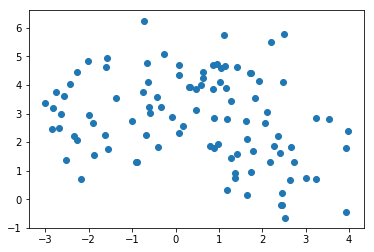

In [263]:
plt.scatter(X[:,0], X[:,1])

# Let's implement it as a class so we can call it at our convenience

In [336]:
class KMeans():
    def __init__(self, k, X):
        self.k = k
        self.data = X
    
        #initialize centroids
        c = []
        for x in range(k):
            #Assign a random value for each centroid, stored in a list.
            #Random values should be between the min and max for each feature.
            c.append([uniform(min(X[:,0]),max(X[:,0])), uniform(min(X[:,1]),max(X[:,1]))])
        
        self.centroids = c
        
    def euclidean(self):
        #given an two arrays of numbers of equal length, return the euclidean distance between the two
        #X is an array with locations for your data points, C is the array required for centroid location

        # get the differences for each feature between centroid location and data point location
        differences = self.data-self.centroids

        #calculate the distance
        #get the elementwise square of the differences
        diff2s = differences**2

        #add all of the squared differences
        a_b_sqrd = diff2s.sum(axis=1)

        #take the elementwise square root. Gives one distance for each feature
        dist = a_b_sqrd**0.5
    
        return dist

    def centroid_call(self):
        """takes the randomly initialized centroids and the data points
        and calls a euclidean distance function to determine how far each data point is
        from each centroid. Then returns a list of the closest centroid to each data point.
        """
        #initialize a list to hold all of the distances
        how_far = []

        #get a list of all of the distances for each point from each centroid
        for centroid in self.centroids:
            how_far.append(euclidean(self.data, centroid))

        #reshape the distance list so we can get the index of the closest centroid (argmax)
        all_centroid_distances = np.c_[how_far]
        matrix = all_centroid_distances.T
        #get the closest centroid for each row (data point)
        closest_centroid = np.argmin(matrix, axis=1)
#         self.clusters = closest_centroid
        return closest_centroid
    
    def cluster_means(self, clusters):
        """given the list of cluster assignments and the data locations, find the mean of each cluster 
        and return the updated centroids"""
        # loop over the number of clusters and calculate the mean for each feature
        for i in range(max(clusters)+1):
            self.centroids[i]=self.data[np.where(clusters==i)].mean(axis=0)
        return self.centroids
    
    

### First, instantiate and give it the K means as well as you data X

In [468]:
m = KMeans(3, X)

In [469]:
# repeat the following until convergence

In [486]:
clusters = m.centroid_call()


In [487]:
y = m.cluster_means(clusters)

In [488]:
xs = [m.centroids[x][0] for x in range(len(m.centroids))]

ys = [m.centroids[x][1] for x in range(len(m.centroids))]


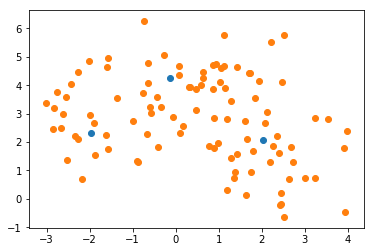

In [489]:
plt.scatter(xs,ys)
plt.scatter(X[:,0], X[:,1])

Next steps:
1. Make the algorithm automatically call m.cluster_means itself so you don't have to
2. Make the algorithm able to repeat the centroid_call/cluster_means automatically a given number of times
3. Give it a way to know that it has converged.
4. Print after each loop a picture of the scatter plot to know where the means are and how they converge